In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Pricing European calls and puts using a binomial tree:**
**Given Conditions:** \\
$S_0$ = 100;
$\ $ r = 5%;
$\ $  σ = 20%;
$\ $ T = 3 months;
$\ $ Moneyness = ATM




In [2]:
def european_option(S_ini, K, T, r, sigma, N, opttype):
    """
    Price an European call or put using a binomial tree.

    Parameters:
    S_ini : float   - initial stock price
    K     : float   - strike price
    T     : float   - time to maturity (years)
    r     : float   - risk-free interest rate
    sigma : float   - volatility
    N     : int     - number of time steps
    opttype: str    - 'C' for call, 'P' for put

    Returns:
    C[0,0]       : float    - the option price at t=0
    C            : 2D array  - option values at each node
    S            : 2D array  - underlying asset prices at each node
    Delta        : 2D array - delta at each node
    """
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

## 1. Finding appropriate no. of steps "N"



In [3]:
# Finding appropriate no. of steps "N"
price_array = []
steps=[1]
for X in range(100,2100,100):
  steps.append(X)
for N in steps:
    price_call, call, S_call, delta_call = european_option(
    100, 100, 3/12, 0.05, 0.20,  N, "C"
     )
    price_array.append(price_call)




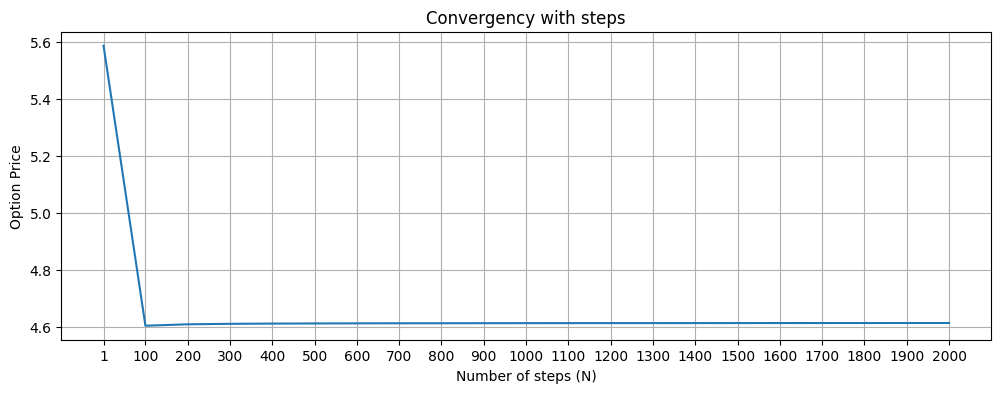

In [4]:
# Plotting the N vs Call Price graph
plt.figure(figsize=(12,4))
plt.plot(steps, np.array(price_array))
plt.xticks(steps)
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()


##2. Pricing European Call and Put
Now that we got N = 100 at which prices start convergiing, we can price European call and put using binomial tree as follows:




In [5]:
price_call, call, S_call, delta_call = european_option(100, 100, 3/12, 0.05, 0.20,  100, "C")
price_put, put, S_put, delta_put = european_option(100, 100, 3/12, 0.05, 0.20,  100, "P")
print(f"European Call Price = {price_call:.2f}")
print(f"European Put Price = {price_put:.2f}")

European Call Price = 4.61
European Put Price = 3.36


In [6]:
S_call[0,0]==S_put[0,0]

np.True_


## 3. Put-Call Parity
Now we will check whether Put-Call parity equation is satisfied as follows:



In [7]:
round(price_call + 100 * np.exp(-0.05 * 3/12), 2) == round(S_call[0, 0] + price_put, 2)

np.True_


We can see that Put-call parity holds for the European options.

## 4. Greek Δ at t=0 for European options
 **Now we calulate delta, Δ at time, t = 0 for European Call and Put**











In [8]:
print("European Call Delta = ",round(delta_call[0,0],2))
print("European Put Delta = ",round(delta_put[0,0],2))

European Call Delta =  0.57
European Put Delta =  -0.43


Delta, Δ at time, t = 0 for European Call and Put is **0.57 and -0.43** respectively.

## 5. Sensitivity of the European option price to the underlying volatility (vega)
vega, $ⱽ = \frac{C_0,σ_1 - C_0,σ_0 }{Δ\sigma}$

where,
$Δ\sigma = \sigma_1 - \sigma_0$

Now, we calculae vega i.e sensitivity of previous put and call option prices to a 5% increase in volatility (from 20% to 25%).





In [9]:
# Pricing European Options at volatility = 20%
price_call_20, call, S_call, delta_call = european_option(100, 100, 3/12, 0.05, 0.20,  100, "C")
price_put_20, put, S_put, delta_put = european_option(100, 100, 3/12, 0.05, 0.20,  100, "P")
print(f"European Call Price at volatility 20% = {price_call_20:.2f}")
print(f"European Put Price at volatility 20% = {price_put_20:.2f}")

# Pricing European Options at volatility = 25%
price_call_25, call, S_call, delta_call = european_option(100, 100, 3/12, 0.05, 0.25,  100, "C")
price_put_25, put, S_put, delta_put = european_option(100, 100, 3/12, 0.05, 0.25,  100, "P")
print(f"European Call Price at volatility 25% = {price_call_25:.2f}")
print(f"European Put Price at volatility 25% = {price_put_25:.2f}")

European Call Price at volatility 20% = 4.61
European Put Price at volatility 20% = 3.36
European Call Price at volatility 25% = 5.59
European Put Price at volatility 25% = 4.34


In [10]:
# Vega for call and Put option
vega_call = round((price_call_25 - price_call_20)/0.05,2)
vega_put = round((price_put_25 - price_put_20)/0.05,2)
print("Vega for European call = ", vega_call)
print("Vega for European put = ", vega_put)

Vega for European call =  19.62
Vega for European put =  19.62


The vega for both European options come out to be 19.62% for increase in volatility from 20% to 25%. While the prices of both options increases with increase in volatility.

# **Pricing American calls and puts using a binomial tree:**
**Given Conditions:** \\
$S_0$ = 100;
$\ $ r = 5%;
$\ $  σ = 20%;
$\ $ T = 3 months;
$\ $ Moneyness = ATM

In [11]:
def american_option(S_ini, K, T, r, sigma, N, opttype):
    """
    Price an American call or put using a binomial tree.

    Parameters:
    S_ini : float   - initial stock price
    K     : float   - strike price
    T     : float   - time to maturity (years)
    r     : float   - risk-free interest rate
    sigma : float   - volatility
    N     : int     - number of time steps
    opttype: str    - 'C' for call, 'P' for put

    Returns:
    C[0,0]       : float    - the option price at t=0
    C            : 2D array  - option values at each node
    S            : 2D array  - underlying asset prices at each node
    Delta        : 2D array - delta at each node
    """
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta


## 1. Finding appropriate no. of steps "N"

In [12]:
# Finding appropriate no. of steps "N"
price_array_am = []
steps_am=[1]
for X in range(50,1050,50):
  steps_am.append(X)
for N in steps:
    price_call_am, call_am, S_call_am, delta_call_am = american_option(
    100, 100, 3/12, 0.05, 0.20,  N, "C"
     )
    price_array_am.append(price_call_am)

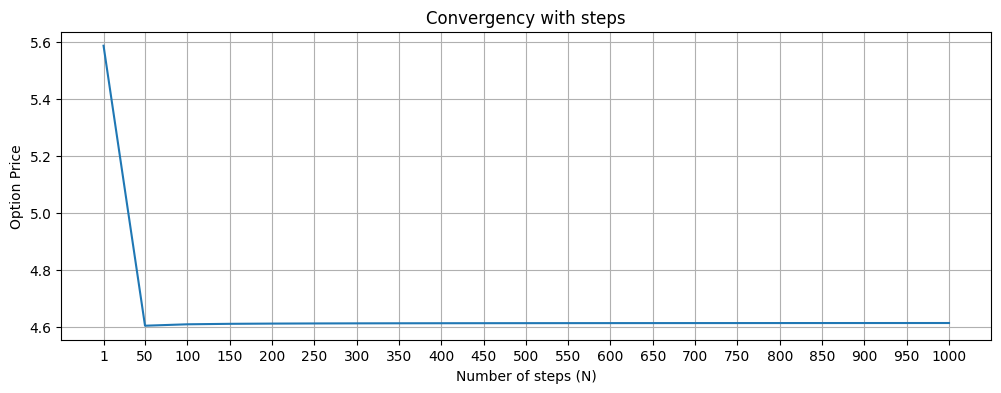

In [13]:
# Plotting the N vs Call Price graph
plt.figure(figsize=(12,4))
plt.plot(steps_am, np.array(price_array_am))
plt.xticks(steps_am)
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

##2. Pricing American Call and Put
Now that we got N = 100 at which prices start convergiing, we can price European call and put using binomial tree as follows:

In [14]:
price_call_am, call_am, S_call_am, delta_call_am = american_option(100, 100, 3/12, 0.05, 0.20,  100, "C")
price_put_am, put_am, S_put_am, delta_put_am = american_option(100, 100, 3/12, 0.05, 0.20,  100, "P")
print(f"American Call Price = {price_call_am:.2f}")
print(f"American Put Price = {price_put_am:.2f}")

American Call Price = 4.61
American Put Price = 3.47


## 3. Greek Δ at t=0 for American options
 **Now we calulate delta, Δ at time, t = 0 for American Call and Put**

In [15]:
print("American Call Delta = ",round(delta_call_am[0,0],2))
print("American Put Delta = ",round(delta_put_am[0,0],2))

American Call Delta =  0.57
American Put Delta =  -0.45


Delta, Δ at time, t = 0 for American Call and Put is **0.57 and -0.45** respectively.

## 4. Sensitivity of the American option price to the underlying volatility (vega)
vega, $ⱽ = \frac{C_0,σ_1 - C_0,σ_0 }{Δ\sigma}$

where,
$Δ\sigma = \sigma_1 - \sigma_0$

Now, we calculae vega i.e sensitivity of previous put and call option prices to a 5% increase in volatility (from 20% to 25%).

In [16]:
# Pricing American Options at volatility = 20%
amprice_call_20, amcall, amS_call, amdelta_call = american_option(100, 100, 3/12, 0.05, 0.20,  100, "C")
amprice_put_20, amput, amS_put, amdelta_put = american_option(100, 100, 3/12, 0.05, 0.20,  100, "P")
print(f"American Call Price at volatility 20% = {amprice_call_20:.2f}")
print(f"American Put Price at volatility 20% = {amprice_put_20:.2f}")

# Pricing American Options at volatility = 25%
amprice_call_25, amcall, amS_call, amdelta_call = american_option(100, 100, 3/12, 0.05, 0.25,  100, "C")
amprice_put_25, amput, amS_put, amdelta_put = american_option(100, 100, 3/12, 0.05, 0.25,  100, "P")
print(f"American Call Price at volatility 25% = {price_call_25:.2f}")
print(f"American Put Price at volatility 25% = {price_put_25:.2f}")

American Call Price at volatility 20% = 4.61
American Put Price at volatility 20% = 3.47
American Call Price at volatility 25% = 5.59
American Put Price at volatility 25% = 4.34


In [17]:
# Vega for call and Put option
vega_call = round((amprice_call_25 - amprice_call_20)/0.05,2)
vega_put = round((amprice_put_25 - amprice_put_20)/0.05,2)
print("Vega for American call = ", vega_call)
print("Vega for American put = ", vega_put)

Vega for American call =  19.62
Vega for American put =  19.57


The vega for American call come out to be 19.62% whereas vega of American put is 19.57% for increase in volatility from 20% to 25%. While the prices of both options increases with increase in volatility.

# **Pricing American calls and puts using a trinomial tree:**
**Given Conditions:** \\
$S_0$ = 100; \\
$\ $r = 5% \\
$\ $σ = 20% \\
$\ $T = 3 months \\
$\ $N = 100 (same as obtained in previous step for simplicity) \\
$\ $Moneyness = 90%, 95%, ATM, 105%,
110% of moneyness = K/S0:

In [18]:
def _gen_stock_vec(S_ini,sigma,nb, h):

    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= S_ini
    return res


In [19]:
def american_tri_option(S_ini, K, T, r, sigma, nb_steps, opttype):
    """
    Price an American call or put using a binomial tree.

    Parameters:
    S_ini : float   - initial stock price
    K     : float   - strike price
    T     : float   - time to maturity (years)
    r     : float   - risk-free interest rate
    sigma : float   - volatility
    nb_steps     : int     - number of time steps
    opttype: str    - 'C' for call, 'P' for put

    Returns:
    nxt_vec_prices[0]       : float    - the option price at t=0

    """

    h = T / nb_steps  # This would be our 'dt' from previous examples
    discount = np.exp(-r * h)  # Define discount factor for simplicity later on

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pm = 1 - pu - pd
    #print(pu, pd, pm)
    # This would be our underlying evolution (Note we are using the function from before!)
    s = _gen_stock_vec(S_ini, sigma, nb_steps, h)

    # Define Payoff (in this case, European Call Option)
    # Define early exercise value of option at each node of tree
    if opttype == "C": # Call
        early_exercise_value = np.maximum(s - K, 0)
    else: # Put
        early_exercise_value = np.maximum(K - s, 0)
    # Calculate option prices at each node of tree using backward induction
    nxt_vec_prices = early_exercise_value

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(S_ini, sigma,nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu
            tmp = max(tmp,early_exercise_value[j])
            expectation[j] = tmp
        # Discount option payoff!
        nxt_vec_prices = discount * expectation

    return nxt_vec_prices[0]

In [20]:
S0 = 100
moneyness = S0 * np.array([0.9, 0.95, 1.0, 1.05, 1.10])
moneyness

array([ 90.,  95., 100., 105., 110.])

In [21]:
american_call_price = []
for K in moneyness:
  price = round(american_tri_option(100,K,3/12,0.05,0.2, 100,'C'),2)
  american_call_price.append(price)
  print(" Price of the American Call Option at K =", round(K,1)," is {:.2f}".format(price))


 Price of the American Call Option at K = 90.0  is 11.67
 Price of the American Call Option at K = 95.0  is 7.72
 Price of the American Call Option at K = 100.0  is 4.61
 Price of the American Call Option at K = 105.0  is 2.48
 Price of the American Call Option at K = 110.0  is 1.19


In [22]:
american_put_price = []
for K in moneyness:
  price = round(american_tri_option(100,K,3/12,0.05,0.2, 100,'P'),2)
  american_put_price.append(price)
  print(" Price of the American Put Option at K =", round(K,1)," is {:.2f}".format(price))

 Price of the American Put Option at K = 90.0  is 65.68
 Price of the American Put Option at K = 95.0  is 70.68
 Price of the American Put Option at K = 100.0  is 75.68
 Price of the American Put Option at K = 105.0  is 80.68
 Price of the American Put Option at K = 110.0  is 85.68


In [23]:
american_tri_df= pd.DataFrame({
    'Strike Price': moneyness,
    'Call Option Price': american_call_price,
    'Put Option Price': american_put_price,
    })

In [24]:
american_tri_df

,Strike Price,Call Option Price,Put Option Price
0,90.0,11.67,65.68
1,95.0,7.72,70.68
2,100.0,4.61,75.68
3,105.0,2.48,80.68
4,110.0,1.19,85.68


We can see that as the strike price increases the price of American Call decreases whereas the price of American Put increases.

## 1. Put-Call Parity
Now we will check whether Put-Call parity equation is satisfied for American options in trinomial tree for all 5 strike pricesas follows:


In [25]:
S_call_am = 100  # Underlying's price at t=0 which s0
# S_call_eur == S_put_eur is true
parity = round(
  american_tri_df['Call Option Price'] + american_tri_df['Strike Price'] * np.exp(-0.05 * 3/12), 2) == round(S_call_am + american_tri_df['Put Option Price'],2)


In [26]:
american_tri_df['Parity'] = parity
american_tri_df

,Strike Price,Call Option Price,Put Option Price,Parity
0,90.0,11.67,65.68,False
1,95.0,7.72,70.68,False
2,100.0,4.61,75.68,False
3,105.0,2.48,80.68,False
4,110.0,1.19,85.68,False


From the table, we can see that Put-call parity **does not** hold for the American options.

# **Pricing European calls and puts using a trinomial tree:**
**Given Conditions:** (same as for American options) \\
$S_0$ = 100; \\
$\ $r = 5% \\
$\ $σ = 20% \\
$\ $T = 3 months \\
$\ $N = 100 (same as obtained in previous step for simplicity) \\
$\ $Moneyness = 90%, 95%, ATM, 105%,
110% of moneyness = K/S0:

In [27]:
def european_tri_option(S_ini, K, T, r, sigma, nb_steps, opttype):
    """
    Price an European call or put using a binomial tree.

    Parameters:
    S_ini : float   - initial stock price
    K     : float   - strike price
    T     : float   - time to maturity (years)
    r     : float   - risk-free interest rate
    sigma : float   - volatility
    nb_steps     : int     - number of time steps
    opttype: str    - 'C' for call, 'P' for put

    Returns:
    nxt_vec_prices[0]       : float    - the option price at t=0

    """

    h = T / nb_steps  # This would be our 'dt' from previous examples
    discount = np.exp(-r * h)  # Define discount factor for simplicity later on

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pm = 1 - pu - pd
    #print(pu, pd, pm)
    # This would be our underlying evolution (Note we are using the function from before!)
    s = _gen_stock_vec(S_ini, sigma, nb_steps, h)

    # Define Payoff (in this case, European Call Option)
    # Define early exercise value of option at each node of tree
    if opttype == "C": # Call
        final_payoff = np.maximum(s - K, 0)
    else: # Put
        final_payoff = np.maximum(K - s, 0)
    # Calculate option prices at each node of tree using backward induction
    nxt_vec_prices = final_payoff

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(S_ini, sigma,nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp
        # Discount option payoff!
        nxt_vec_prices = discount * expectation

    return nxt_vec_prices[0]

In [28]:
european_call_price = []
for K in moneyness:
  price = round(european_tri_option(100,K,3/12,0.05,0.2, 100,'C'),2)
  european_call_price.append(price)
  print(" Price of the European Call Option at K =", round(K,1)," is {:.2f}".format(price))

 Price of the European Call Option at K = 90.0  is 11.67
 Price of the European Call Option at K = 95.0  is 7.72
 Price of the European Call Option at K = 100.0  is 4.61
 Price of the European Call Option at K = 105.0  is 2.48
 Price of the European Call Option at K = 110.0  is 1.19


In [29]:
european_put_price = []
for K in moneyness:
  price = round(european_tri_option(100,K,3/12,0.05,0.2, 100,'P'),2)
  european_put_price.append(price)
  print(" Price of the European Put Option at K =", round(K,1)," is {:.2f}".format(price))

 Price of the European Put Option at K = 90.0  is 0.55
 Price of the European Put Option at K = 95.0  is 1.54
 Price of the European Put Option at K = 100.0  is 3.37
 Price of the European Put Option at K = 105.0  is 6.18
 Price of the European Put Option at K = 110.0  is 9.83


In [30]:
european_tri_df= pd.DataFrame({
    'Strike Price': moneyness,
    'Call Option Price': european_call_price,
    'Put Option Price': european_put_price,
    })

In [31]:
european_tri_df

,Strike Price,Call Option Price,Put Option Price
0,90.0,11.67,0.55
1,95.0,7.72,1.54
2,100.0,4.61,3.37
3,105.0,2.48,6.18
4,110.0,1.19,9.83


We can see that as the strike price increases the price of European Call decreases whereas the price of European Put increases.

## 1. Put-Call Parity
Now we will check whether Put-Call parity equation is satisfied for European options in trinomial tree for all 5 strike pricesas follows:

In [32]:
S_call_eur = 100  # Underlying's price at t=0 which s0
# S_call_eur == S_put_eur is true
parity = round(
  european_tri_df['Call Option Price'] + european_tri_df['Strike Price'] * np.exp(-0.05 * 3/12), 1) == round(S_call_eur + european_tri_df['Put Option Price'],1)


In [33]:
european_tri_df['Parity'] = parity
european_tri_df

,Strike Price,Call Option Price,Put Option Price,Parity
0,90.0,11.67,0.55,True
1,95.0,7.72,1.54,True
2,100.0,4.61,3.37,True
3,105.0,2.48,6.18,True
4,110.0,1.19,9.83,True


From the table, we can see that Put-call parity holds for the European options.

# **Graphs**
**Given Conditions:** (same as for American options) \\
$S_0$ = [70, 80, 90, 100, 110, 120, 130, 140, 150]; \\
$\ $r = 5% \\
$\ $σ = 20% \\
$\ $T = 3 months \\
$\ $N = 100  \\
$\ $K = [80, 85, 90, 95, 100, 105, 110, 115, 120]:

In [34]:
def option_v_stock(stock_price):
    # Initialising
    euro_call_price =[]
    euro_put_price = []
    am_call_price = []
    am_put_price = []

    # Pricing European call and put
    for S in stock_price:
      price_call = european_option(S, 100, 3/12, 0.05, 0.20,  100, "C")[0]
      euro_call_price.append(price_call)
      price_put = european_option(S, 100, 3/12, 0.05, 0.20,  100, "P")[0]
      euro_put_price.append(price_put)
      price_call_am = american_option(S, 100, 3/12, 0.05, 0.20,  100, "C")[0]
      am_call_price.append(price_call_am)
      price_put_am = american_option(S, 100, 3/12, 0.05, 0.20,  100, "P")[0]
      am_put_price.append(price_put_am)

    return euro_call_price, euro_put_price, am_call_price, am_put_price


In [35]:
def option_v_strike(strike_price):
    # Initialising
    euro_call_price =[]
    euro_put_price = []
    am_call_price = []
    am_put_price = []

    # Pricing European call and put
    for K in strike_price:
      price_call = european_option(100, K, 3/12, 0.05, 0.20,  100, "C")[0]
      euro_call_price.append(price_call)
      price_put = european_option(100, K, 3/12, 0.05, 0.20,  100, "P")[0]
      euro_put_price.append(price_put)
      price_call_am = american_option(100, K, 3/12, 0.05, 0.20,  100, "C")[0]
      am_call_price.append(price_call_am)
      price_put_am = american_option(100, K, 3/12, 0.05, 0.20,  100, "P")[0]
      am_put_price.append(price_put_am)

    return euro_call_price, euro_put_price, am_call_price, am_put_price

In [36]:
# Array of Stock Price
stock_price = np.arange(70, 160, 10)
# Array of Strike Price
strike_price = np.arange(80, 125, 5)

stock_euro_call, stock_euro_put, stock_am_call, stock_am_put = option_v_stock(stock_price)
strike_euro_call, strike_euro_put, strike_am_call, strike_am_put = option_v_strike(strike_price)

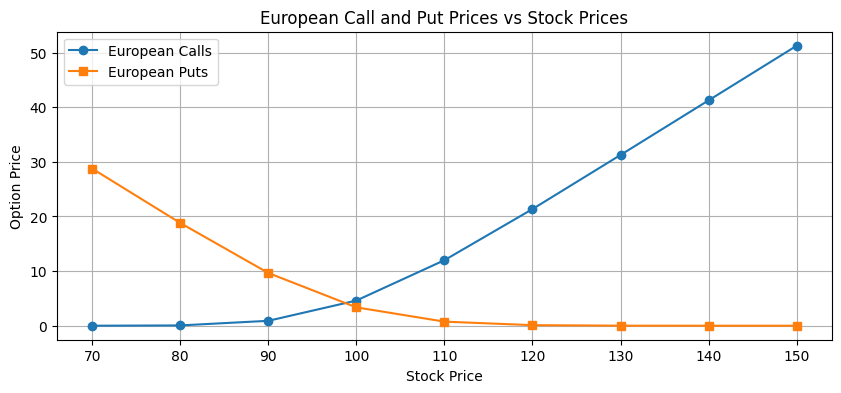

In [37]:
#1. Graph European call prices and put prices versus stock prices.
plt.figure(figsize=(10,4))
plt.plot(stock_price, stock_euro_call, label='European Calls', marker='o')
plt.plot(stock_price, stock_euro_put, label='European Puts', marker='s')
plt.xticks(stock_price)
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Call and Put Prices vs Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

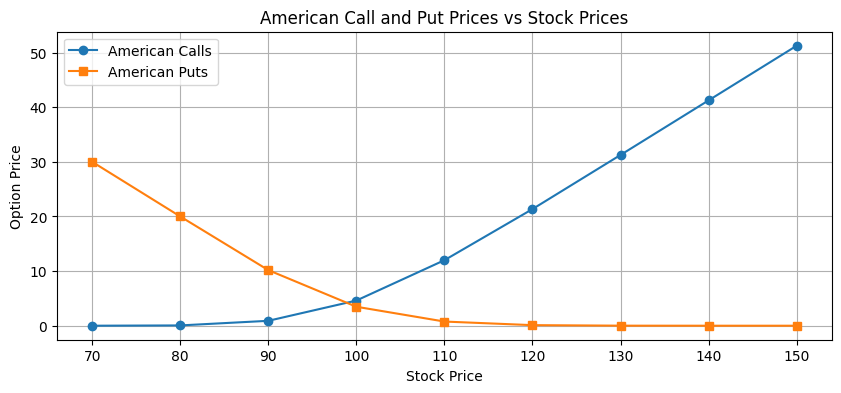

In [38]:
#2. Graph American call prices and put prices versus stock prices.
plt.figure(figsize=(10,4))
plt.plot(stock_price, stock_am_call, label='American Calls', marker='o')
plt.plot(stock_price, stock_am_put, label='American Puts', marker='s')
plt.xticks(stock_price)
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('American Call and Put Prices vs Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


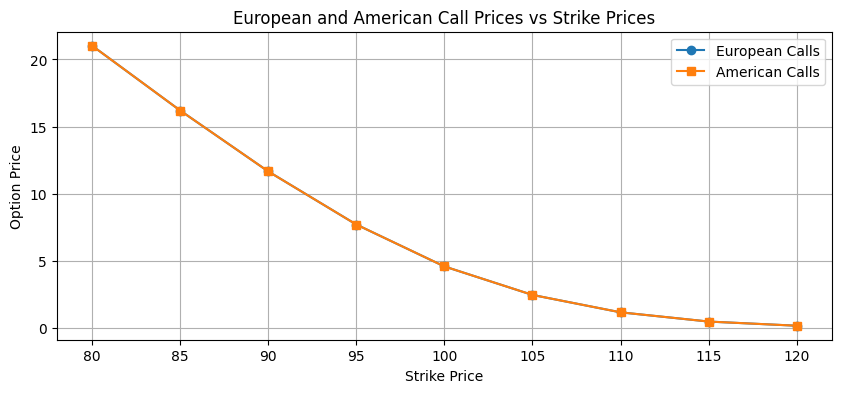

In [39]:
#3. Graph European and American call prices versus strike.
plt.figure(figsize=(10,4))
plt.plot(strike_price, strike_euro_call, label='European Calls', marker='o')
plt.plot(strike_price, strike_am_call, label='American Calls', marker='s')
plt.xticks(strike_price)
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('European and American Call Prices vs Strike Prices')
plt.legend()
plt.grid(True)
plt.show()

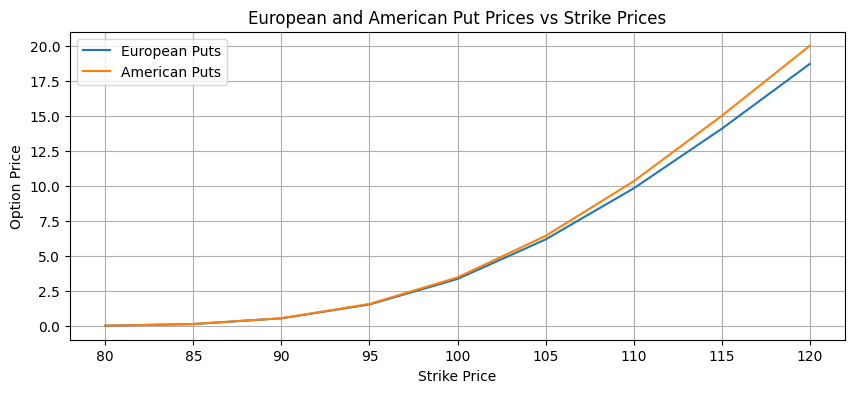

In [40]:
#4. Graph European and American put prices versus strike.
plt.figure(figsize=(10,4))
plt.plot(strike_price, strike_euro_put, label='European Puts')
plt.plot(strike_price, strike_am_put, label='American Puts')
plt.xticks(strike_price)
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('European and American Put Prices vs Strike Prices')
plt.legend()
plt.grid(True)
plt.show()